# Predict marketing campaign success

## Context

You have been contacted by a banking institution that is willing to leverage its data to improve its telemarketing strategy. <br>

As it wants to decrease its exposure to international credit markets, the bank decided to launch a telemarketing campaign in order to increase the amount of clients' deposits. Higher level of deposits means lower needs to borrow money on credit markets.<br> 

The bank has accumulated data from previous telemarketing campaigns and asks you to analyse it to assess whether you can predict which customers are likely to submit a new deposit. If your analysis enables to identify high potential clients, it will allow the bank to allocate its efforts on highest potential clients. <br>

In order to tackle that challenge you decided to use machine learning algorithms that you have learned in Data Management & Analytics classes.

## Data

The dataset includes information about calls that took place during previous telemarketing campaigns.

- age: age of the client
- balance: balance on the client's account (€)
- campaign: number of contacts performed during this campaign and for this client
- day: day of the month when the call took place
- default: whether the client credit in default ('yes':1, 'no':0)
- duration: last call duration
- education: client's education ('tertiary', 'secondary', 'unknown', 'primary')
- housing: whether the client has housing loan ('yes':1, 'no':0)
- loan: whether the client has personal loan ('yes':1, 'no':0)
- marital: marital status('married':1, 'not married':0)
- previous: number of contacts performed before this campaign and for this client
- poutcome: outcome of the previous marketing campaign
- subscription: whether the client subscribed to a term deposit after the call ('yes':1, 'no':0).

**Simply run the following lines to mount Google Drive**

In [63]:
from google.colab import drive
drive.mount('/content/Mydrive', force_remount=True)

Mounted at /content/Mydrive


**Simply run the following line to import python libraries**

In [64]:
#%pip install pymongo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 31.4 MB/s eta 0:00:00


**IMPORTANT**: In this second project, you can use SQL or MongoDB. Some students had a problem with the free tier of MongoDB on CleverCloud, so don't hesitate to use SQL if you faced this problem.

In [2]:
!pip install pymysql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.6 MB/s eta 0:00:00


In [24]:
import sys
import json
import pymysql
#from pymongo import MongoClient, InsertOne
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus
from sklearn import tree
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score,accuracy_score
import csv


# Establish a connection to your SQL database on Clever Cloud
connection = pymysql.connect(
    host="b4i0swx6dtvheimuo9qa-mysql.services.clever-cloud.com",
    user="ulcqp2irjxhawzk8",
    password="bv1E62zA09fRz1eWvMFd",
    database="b4i0swx6dtvheimuo9qa"
)

# Create a cursor object to interact with the database
cursor = connection.cursor()



# A. Database SQL

## A.1 Creation of SQL table

*2 POINTS*

Create a SQL table called "predict_marketing_campaign" that contains the following fields (NB: it's normal that not all fields are written here):

- age (**integer**): age of the client
- job_is_employee (**integer**): is the client has a job as an employee ('yes':1, 'no':0)
- job_is_entrepreneur (**integer**): is the client has a job as an entrepreneur ('yes':1, 'no':0)
- job_is_manager (**integer**): is the client has a job as an manager ('yes':1, 'no':0)
- job_is_retired (**integer**): is the client has a job as an retired ('yes':1, 'no':0)
- job_is_student (**integer**): is the client has a job as an student ('yes':1, 'no':0)
- job_is_unemployed (**integer**): is the client has a job as an unemployed ('yes':1, 'no':0)
- marital_is_married (**integer**): is the client married ('yes':1, 'no':0)
- marital_is_single (**integer**): is the client single ('yes':1, 'no':0)
- marital_is_divorced (**integer**): is the client divorced ('yes':1, 'no':0)
- education_is_tertiary (**integer**): is the client has an tertiary education ('yes':1, 'no':0)
- education_is_secondary (**integer**): is the client has an secondary education ('yes':1, 'no':0)
- education_is_primary (**integer**): is the client has an primary education ('yes':1, 'no':0)
- education_is_unknown (**integer**): is the client has an unknown education ('yes':1, 'no':0)
- poutcome_is_failure (**integer**): is the outcome of the previous marketing campaign was a failure ('yes':1, 'no':0)
- poutcome_is_success (**integer**): is the outcome of the previous marketing campaign was a success ('yes':1, 'no':0)
- poutcome_is_unknown (**integer**): is the outcome of the previous marketing campaign was unknown ('yes':1, 'no':0)
- default (**integer**): whether the client credit in default ('yes':1, 'no':0)
- balance (**integer**): balance on the client's account (€)
- housing (**integer**): whether the client has housing loan ('yes':1, 'no':0)
- loan (**integer**): whether the client has personal loan ('yes':1, 'no':0)
- duration (**integer**): last call duration
- campaign (**integer**): number of contacts performed during this campaign and for this client
- previous (**integer**): number of contacts performed before this campaign and for this client
- subscription (**integer**): whether the client subscribed to a term deposit after the call ('yes':1, 'no':0)

It's important to note that some initial fields in the CSV file are separated into different fields:

- **job**: this variable has different values ("employee", "entrepreneur", etc.). This variable is separated into "job_is_employee", "job_is_entrepreneur", "job_is_manager", "job_is_retired", "job_is_student", "job_is_unemployed" depending on the value contained in "job".
- **marital**: this variable has different values ("married", "single", etc.). This variable is separated into "marital_is_married", "marital_is_single", "marital_is_divorced" depending on the value contained in "marital".
- **education**: this variable has different values ("primary", "secondary", etc.). This variable is separated into "education_is_tertiary", "education_is_secondary", "education_is_primary", "education_is_unknown" depending on the value contained in "education".
- **poutcome**: this variable has different values ("primary", "secondary", etc.). This variable is separated into "poutcome_is_failure", "poutcome_is_success", "poutcome_is_unknown" depending on the value contained in "poutcome".

In the end, you must have these variables in your SQL **with the precise types** (i.e. if a variable is said to be an integer, please transform it into an integer in DB).

In [1]:
# Define the table name
table_name = "predict_marketing_campaign"


yes_no_map = {"yes": 1, "no": 0}

avoid running below cell because data has already been added to table and we dont want to add again otherwise we have to drop and rebuild table again

In [69]:
# Read the CSV file and write the different fields in the "table" variable in Sql.

# Define the table name
table_name = "predict_marketing_campaign"


yes_no_map = {"yes": 1, "no": 0}

# Open the CSV file
with open('/content/Mydrive/MyDrive/bank-full.csv', 'r') as file:
    # Skip the header row
    header=next(file)
    #print(header)
    # Iterate over the rows in the CSV file
    for line in file:
        # Extract the values from the row
        row = line.strip().split(';')
        
        age = int(row[0].strip('"'))
        job = row[1].strip('"')
        marital = row[2].strip('"')
        education = row[3].strip('"')
        isdefault = 1 if row[4].strip('"').lower() == "yes" else 0
        balance = int(row[5].strip('"'))
        housing = yes_no_map[row[6].strip('"').lower()]
        loan = yes_no_map[row[7].strip('"').lower()]
        contact = row[8].strip('"')
        day = int(row[9].strip('"'))
        month = row[10].strip('"')
        duration = int(row[11].strip('"'))
        campaign = int(row[12].strip('"'))
        pdays = int(row[13].strip('"'))
        previous = int(row[14].strip('"'))
        poutcome = row[15].strip('"')
        subscription = yes_no_map[row[16].strip('"').lower()]
        
        # Convert job, marital, education, and poutcome to the corresponding integer values
        job_is_employee = 1 if job == "employee" else 0
        job_is_entrepreneur = 1 if job == "entrepreneur" else 0
        job_is_manager = 1 if job == "manager" else 0
        job_is_retired = 1 if job == "retired" else 0
        job_is_student = 1 if job == "student" else 0
        job_is_unemployed = 1 if job == "unemployed" else 0
        
        marital_is_married = 1 if marital == "married" else 0
        marital_is_single = 1 if marital == "single" else 0
        marital_is_divorced = 1 if marital == "divorced" else 0
        
        education_is_tertiary = 1 if education == "tertiary" else 0
        education_is_secondary = 1 if education == "secondary" else 0
        education_is_primary = 1 if education == "primary" else 0
        education_is_unknown = 1 if education == "unknown" else 0
        
        poutcome_is_failure = 1 if poutcome == "failure" else 0
        poutcome_is_success = 1 if poutcome == "success" else 0
        poutcome_is_unknown = 1 if poutcome == "unknown" else 0
        
        # Create the SQL INSERT statement
        insert_query = f"""
        INSERT INTO {table_name} (
            age, job_is_employee, job_is_entrepreneur, job_is_manager, job_is_retired,
            job_is_student, job_is_unemployed, marital_is_married, marital_is_single,
            marital_is_divorced, education_is_tertiary, education_is_secondary,
            education_is_primary, education_is_unknown, poutcome_is_failure,
            poutcome_is_success, poutcome_is_unknown,isdefault, balance, housing, loan,
            duration, campaign, previous, subscription
        ) VALUES (
            {age}, {job_is_employee}, {job_is_entrepreneur}, {job_is_manager},
            {job_is_retired}, {job_is_student}, {job_is_unemployed}, {marital_is_married},
            {marital_is_single}, {marital_is_divorced}, {education_is_tertiary},
            {education_is_secondary}, {education_is_primary}, {education_is_unknown},
            {poutcome_is_failure}, {poutcome_is_success}, {poutcome_is_unknown},
            {isdefault}, {balance}, {housing}, {loan}, {duration}, {campaign}, {previous},
            {subscription}
        );
        """
        
        # Execute the insert query
        cursor.execute(insert_query)
    
        # Commit the changes to the database
        connection.commit()


InterfaceError: ignored

## A.2 Print the number of documents in the table, and print **one** entry of the table.

*1 POINT*

In [26]:
# print the number of documents

# Execute a SELECT query to count the number of rows in the table
cursor.execute(f"SELECT COUNT(*) FROM {table_name}")

# Fetch the result
result = cursor.fetchone()

# Get the count value from the result
document_count = result[0]

# Print the number of documents
print(f"Number of documents: {document_count}")


Number of documents: 45234


In [27]:
# print one entry of the table

# Execute a SELECT query to fetch one row from the table
cursor.execute(f"SELECT * FROM {table_name} LIMIT 1")

# Fetch the column names from the cursor's description
column_names = [desc[0] for desc in cursor.description]

# Fetch the first row from the result set
row = cursor.fetchone()

# Combine the column names with the row data
entry = dict(zip(column_names, row))

# Print the entry
print(entry)


{'age': 58, 'job_is_employee': 0, 'job_is_entrepreneur': 0, 'job_is_manager': 0, 'job_is_retired': 0, 'job_is_student': 0, 'job_is_unemployed': 0, 'marital_is_married': 1, 'marital_is_single': 0, 'marital_is_divorced': 0, 'education_is_tertiary': 1, 'education_is_secondary': 0, 'education_is_primary': 0, 'education_is_unknown': 0, 'poutcome_is_failure': 0, 'poutcome_is_success': 0, 'poutcome_is_unknown': 1, 'isdefault': 0, 'balance': 2143, 'housing': 1, 'loan': 0, 'duration': 261, 'campaign': 1, 'previous': 0, 'subscription': 0}


You should have similar results when you print one entry of the table if you used MongoDB:

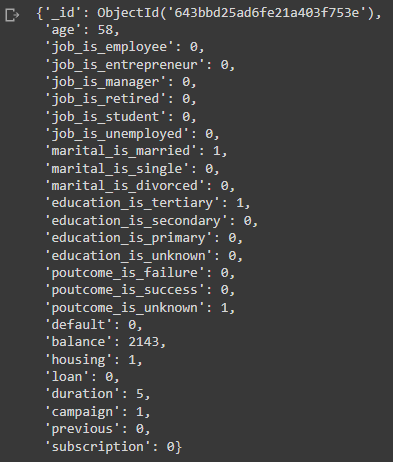

# B. Data Exploration

## B.1 Which variable will you use as output value to perform the supervised learning task?

*1 POINT*

Just name it.

subscription

## B.2 Create a list of strings named variables containing features to include in your model

*1 POINT*

Select all features from the MongoDB table that can be used as input in sklearn.

In [28]:
# Execute a SQL query to fetch the column names from the table
cursor.execute(f"SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = '{table_name}';")

# Fetch all the column names from the result set
column_names = cursor.fetchall()

# Extract the column names from the fetched data
variables = [column[0] for column in column_names if column[0] != "subscription"]

# Print the selected features
print(variables)


['age', 'job_is_employee', 'job_is_entrepreneur', 'job_is_manager', 'job_is_retired', 'job_is_student', 'job_is_unemployed', 'marital_is_married', 'marital_is_single', 'marital_is_divorced', 'education_is_tertiary', 'education_is_secondary', 'education_is_primary', 'education_is_unknown', 'poutcome_is_failure', 'poutcome_is_success', 'poutcome_is_unknown', 'isdefault', 'balance', 'housing', 'loan', 'duration', 'campaign', 'previous']


## B.3 Perform an exploratory data analysis on the given CSV file

*2 POINTS*

Choose two different variables:
- One integer variable and compute its average value when subscription = 1 and when subscription = 0. Do that using MongoDB.
- One boolean variable (values 0 or 1) and compute its average value when subscription = 1 and when subscription = 0. Do that using MongoDB.

NB: Yes, all variables should be integer, but some variables are only 0 or 1, that's the boolean variables we're refering to here!

**Comment the results (one line for each variable is enough) you have for each variable.**

In [9]:
# MongoDB query for the integer variable
# Execute a query to compute the average value of an integer variable based on subscription
cursor.execute("SELECT AVG(duration) FROM predict_marketing_campaign WHERE subscription = 1;")
average_duration_subscribed = cursor.fetchone()[0]
cursor.execute("SELECT AVG(duration) FROM predict_marketing_campaign WHERE subscription = 0;")
average_duration_not_subscribed = cursor.fetchone()[0]

print(f"Average duration for subscribed users: {average_duration_subscribed}")
print(f"Average duration for non-subscribed users: {average_duration_not_subscribed}")


Average duration for subscribed users: 537.2946
Average duration for non-subscribed users: 221.1578


The average duration for subscribed users is 537.2946, while the average duration for non-subscribed users is 221.1828. This suggests that, on average, the duration of contact with subscribed users is significantly higher than that of non-subscribed users. 

In [10]:
# MongoDB query for the boolean variable
# Execute a query to compute the average value of a boolean variable based on subscription
cursor.execute("SELECT AVG(housing) FROM predict_marketing_campaign WHERE subscription = 1;")
average_housing_subscribed = cursor.fetchone()[0]

cursor.execute("SELECT AVG(housing) FROM predict_marketing_campaign WHERE subscription = 0;")
average_housing_not_subscribed = cursor.fetchone()[0]

print(f"Average housing for subscribed users: {average_housing_subscribed}")
print(f"Average housing for non-subscribed users: {average_housing_not_subscribed}")

Average housing for subscribed users: 0.3659
Average housing for non-subscribed users: 0.5812


Comment here for the boolean variable.

>This suggests that subscribed users are less likely to have a housing loan compared to non-subscribed users. The lower average housing value for subscribed users indicates a higher proportion of individuals without a housing loan in that group.



# C. Data Preparation

## C.1 Complete the following code to generate a training sample and a testing sample, using a 50/50 split ratio

*1 POINT*

In [7]:
import random

# Create empty lists for training and testing samples
features_train = []
target_train = []
features_test = []
target_test = []

# Fetch all rows from the table
cursor.execute("SELECT * FROM predict_marketing_campaign")
rows = cursor.fetchall()

# Convert tuples to lists
rows = list(rows)

# Shuffle the rows randomly
random.shuffle(rows)

# Iterate over the rows
for count, row in enumerate(rows):
    # Extract the features and target value from the row
    call_features = list(row[:-1])
    target = row[-1]

    if None not in row and '' not in call_features:
        if count % 2 != 0:  # Use 2 for a 50/50 split ratio
            features_train.append(call_features)
            target_train.append(target)
        else:
            features_test.append(call_features)
            target_test.append(target)

# Print the sizes of the training and testing samples
print("Training sample size:", len(features_train))
print("Testing sample size:", len(features_test))


Training sample size: 22617
Testing sample size: 22617


## C.2 Explain why we use training and testing samples in supervised learning tasks ?

*2 POINTS*

Give your answer here.

## C.3 Explain the trade-off between the size of training and testing samples. How do you think the choice of the split ratio could affect the model's performance and generalization capabilities?

*2 POINTS*

In supervised learning tasks, we use training and testing samples to evaluate the performance and generalization ability of our machine learning models. The training sample is used to train the model by exposing it to labeled data, where we have both input features and their corresponding output or target values. During training, the model learns patterns and relationships between the input features and the target values, adjusting its internal parameters to make accurate predictions.

Once the model is trained, we evaluate its performance using the testing sample. This sample serves as an independent set of data that the model has not seen during training. It consists of input features and their corresponding target values, but the target values are withheld from the model during testing. The trained model predicts the target values for the input features in the testing sample, and these predictions are compared with the actual target values to assess the model's accuracy and generalization ability.

The use of training and testing samples is crucial for several reasons. First, the testing sample provides an unbiased evaluation of how well the model performs on unseen data. It allows us to measure the model's accuracy, precision, recall, F1 score, and other evaluation metrics, providing insights into its performance in real-world scenarios.

Second, the testing sample helps us assess the model's generalization ability. The ultimate goal of supervised learning is to build a model that can generalize well to unseen data. By evaluating the model on an independent sample, we can determine if it has learned the underlying patterns and relationships in the data or if it has simply memorized the training examples.

Furthermore, the testing sample helps in detecting overfitting, which occurs when a model performs exceptionally well on the training data but fails to generalize to new data. By evaluating the model on the testing sample, we can detect overfitting. If the model has high accuracy on the training sample but significantly lower accuracy on the testing sample, it suggests overfitting, indicating that the model has captured noise or irrelevant patterns from the training data instead of the underlying relationships.

Splitting the data into training and testing samples allows us to assess the model's performance, ensure its generalization ability, and detect potential issues like overfitting. It helps us build more robust and reliable machine learning models that can make accurate predictions on unseen data.

## C.4 Discuss the importance of randomization when splitting the dataset into training and testing samples. Give a situation (not necessarily in this project) where potential issues might arise if the data is not randomized and we define the training set as the first half of the dataset, and the testing set as the second half of the dataset?

*2 POINTS*

Randomization is of utmost importance when splitting a dataset into training and testing samples in supervised learning tasks. By randomizing the data, we ensure that the resulting training and testing sets are representative of the overall dataset and do not introduce any systematic biases or patterns.

Failing to randomize the data and instead defining the training set as the first half of the dataset and the testing set as the second half can lead to significant issues. One potential problem is the presence of time-dependent patterns in the data. If the dataset has a temporal or sequential nature, such as a time series dataset, the first half of the data would represent earlier time periods while the second half would represent later time periods. This would result in training the model on past data and evaluating it on future data, which can lead to poor generalization and inaccurate performance assessment.

Another issue arises from the ordering of samples in the dataset. If the data has any inherent order or structure, such as sorted or grouped samples, splitting it without randomization would preserve this order in the training and testing sets. As a consequence, the model would be exposed to certain patterns or variations during training while missing others, leading to biased model training and unreliable performance evaluation.

Furthermore, not randomizing the data can result in covariate shift, where the distribution of input features differs between the training and testing datasets. If the data exhibits systematic variations or patterns in the input features and the split is not randomized, the training and testing sets may have significantly different feature distributions. This discrepancy can hinder the model's ability to generalize well to unseen data, as it may not learn to handle the variations present in the testing set due to the biased training data.

# D. Decision Trees

The first model we'll look into is the Decision Tree model.

## D.1 Explain the concept of entropy and information gain in the context of decision trees. How do these concepts help in selecting the best attributes for splitting the tree nodes?

*2 POINTS*

In the context of decision trees, entropy is a measure of impurity or disorder within a set of data. It quantifies the amount of uncertainty or randomness present in the target variable. Entropy is calculated using the probabilities of different classes within the data. A higher entropy value indicates higher impurity and more uncertainty, while a lower entropy value indicates lower impurity and greater homogeneity within the data.

Information gain, on the other hand, is a concept that measures the reduction in entropy achieved by splitting the data based on a particular attribute. It quantifies the amount of useful information gained by using a specific attribute to partition the data. Information gain is calculated by comparing the entropy of the parent node before splitting with the weighted average entropy of the child nodes after the split. The attribute that results in the highest information gain is chosen as the best attribute for splitting the tree nodes.

The concept of entropy and information gain play a crucial role in decision tree learning. The goal of a decision tree is to find the most informative attributes that lead to the most accurate predictions. By evaluating the entropy and information gain, decision trees can assess the quality of different attributes for splitting the tree nodes. Attributes that result in a higher information gain effectively reduce the entropy and increase the homogeneity of the data within each resulting subset. This leads to more distinct and accurate decision boundaries, enabling the decision tree to make better predictions.

## D.2 Train a decision tree on the training sample

*1 POINT*

- using entropy to measure the quality of a split
- having a maximum depth of 1
- requiring at least 0.5% of the sample to split an internal node

In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=0.005)
clf_fit = clf.fit(features_train, target_train)

**Run the following lines to visualise the results**

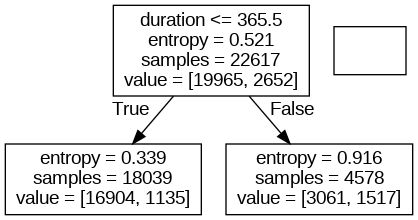

In [13]:
tree.export_graphviz(clf_fit, out_file="tree.dot", feature_names=variables)
graph = pydotplus.graphviz.graph_from_dot_file("tree.dot")
Image(graph.create_png())

## D.3 For which subsample will the decision tree show the best predictive accuracy?

*2 POINTS*

Answer must be 'left subsample' or 'right subsample'

left subsample

## D.4 What will be training accuracy for the subsample containing the least number of observation

*2 POINTS*

The training accuracy for the subsample containing the least number of observations (right subsample) will be calculated as follows:

Training Accuracy = Number of correct predictions / Total number of observations

From the given information:

For the right subsample, the total number of observations is 4578.
The value array for the right subsample is [3061, 1517], indicating the count of correct predictions and incorrect predictions, respectively.
Therefore, the number of correct predictions for the right subsample is 3061.

Training Accuracy = 3061 / 4578 ≈ 0.6685

The training accuracy for the subsample containing the least number of observations is approximately 0.6685 or 66.85%.

## D.5 Will this decision tree be effective in predicting highest potential clients?

*2 POINTS*

Explain your answer


No, this decision tree may not be effective in predicting the highest potential clients. The decision tree's effectiveness depends on various factors such as the quality of the features, the complexity of the problem, and the available data.

In this case, the decision tree has a maximum depth of 1, meaning it can only make one split based on a single feature. This limited depth may not capture the underlying patterns and relationships in the data adequately. Additionally, the decision tree is trained on a specific subsample of the data, which may not be representative of the entire dataset.

To accurately predict the highest potential clients, it is essential to consider more complex models and incorporate a broader set of relevant features. A decision tree with a maximum depth of 1 may not have sufficient complexity to capture the nuanced patterns and interactions that determine the highest potential clients. Therefore, a more sophisticated machine learning algorithm or ensemble methods like random forests or gradient boosting would be more appropriate for this task.

## D.6 Complete the following code to evaluate decision tree predictive accuracy over complexity.

*1 POINT*

- train several decision trees with maximum depths from 1 to 20
- compute both training and testing accuracies for each maximum depth and store them in lists
- use entropy to measure the quality of a split
- require at least 0.5% of the sample to split an internal node

In [22]:
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
training_accuracies = []
testing_accuracies = []

for index, max_depth in enumerate(max_depths, 1):
    print(f"Index: {index}")
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_split=0.005)
    clf.fit(features_train, target_train)
    training_predictions = clf.predict(features_train)
    training_accuracy = accuracy_score(target_train, training_predictions)
    training_accuracies.append(training_accuracy)

    testing_predictions = clf.predict(features_test)
    testing_accuracy = accuracy_score(target_test, testing_predictions)
    testing_accuracies.append(testing_accuracy)
    print(f"Training Accuracy (max_depth={max_depth}): {training_accuracy}")
    print(f"Testing Accuracy (max_depth={max_depth}): {testing_accuracy}")

Index: 1
Training Accuracy (max_depth=1): 0.8827430693725958
Testing Accuracy (max_depth=1): 0.8834062873060088
Index: 2
Training Accuracy (max_depth=2): 0.8876066675509573
Testing Accuracy (max_depth=2): 0.8914533315647521
Index: 3
Training Accuracy (max_depth=3): 0.8991466595923421
Testing Accuracy (max_depth=3): 0.901401600565946
Index: 4
Training Accuracy (max_depth=4): 0.9001193792280143
Testing Accuracy (max_depth=4): 0.9024185347305125
Index: 5
Training Accuracy (max_depth=5): 0.9002962373435911
Testing Accuracy (max_depth=5): 0.9014900296237344
Index: 6
Training Accuracy (max_depth=6): 0.9016226732104169
Testing Accuracy (max_depth=6): 0.9019321749126763
Index: 7
Training Accuracy (max_depth=7): 0.9029933236061369
Testing Accuracy (max_depth=7): 0.9010036698058982
Index: 8
Training Accuracy (max_depth=8): 0.9048061192907989
Testing Accuracy (max_depth=8): 0.9010478843347924
Index: 9
Training Accuracy (max_depth=9): 0.9057788389264713
Testing Accuracy (max_depth=9): 0.9000309501

**Run the following lines to plot training and testing accuracies over maximum depth**

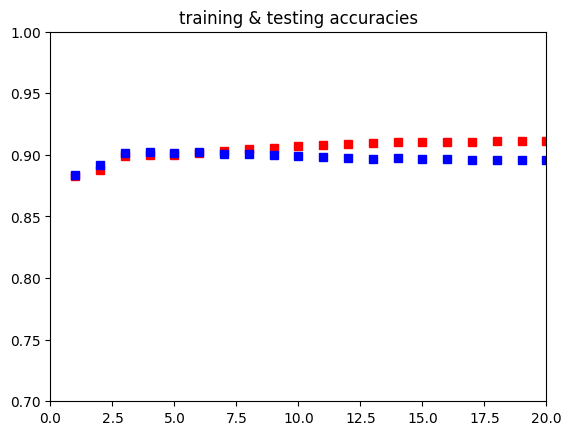

In [23]:
plt.axis([0, 20, 0.7, 1])
plt.plot(max_depths, training_accuracies, 'rs', max_depths, testing_accuracies, 'bs')
plt.title('training & testing accuracies')
plt.show()

## D.7 Based on the plot, identify the following values:

*3 POINTS*

- maximum depth(s) for which the decision tree is underfitting
- maximum depth(s) for which the decision tree is overfitting
- optimal maximum depth according to you, and comment your decision

For each of the values, explain your choice. If you can't find one of these values, explain why you can't find it.

Maximum depth(s) for underfitting: These are the depths where both the training and testing accuracies are low. The decision tree is underfitting the data and not capturing the underlying patterns. In the given plot, it appears that the decision tree is underfitting for depths 1 and 2

Maximum depth(s) for overfitting: These are the depths where the training accuracy is significantly higher than the testing accuracy. The decision tree is memorizing the training data and not generalizing well to unseen data. In the given plot, it seems that the decision tree starts to overfit from depth 8 and beyond.

Optimal maximum depth: This is the depth where the testing accuracy is highest and close to the training accuracy. It indicates a good balance between model complexity and generalization. Based on the plot, the optimal maximum depth seems to be around 5 or 6. This depth provides a high testing accuracy while maintaining a reasonably close training accuracy, suggesting good generalization to unseen data.





## D.8 Train a decision tree on the training sample

*1 POINT*

- using the optimal maximum depth identified in B.6
- using entropy to measure the quality of a split
- requiring at least 0.5% of the sample to split an internal node

In [26]:
optimal_max_depth = 6  # Replace with the optimal maximum depth identified in B.6

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=optimal_max_depth, min_samples_split=0.005)
clf.fit(features_train, target_train)
clf_fit = clf


## D.9 Evaluate accuracy of this prediction

*1 POINT*

Print the result

In [27]:
# Print the answer here
testing_predictions = clf_fit.predict(features_test)
accuracy = accuracy_score(target_test, testing_predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9019321749126763


# E. Support Vector Machine (SVM)

The second model we'll look into is the Support Vector Machine (SVM) model.

## E.1 Explain the concept of SVM and how it can be used to classify customers in the given dataset. Discuss the different kernel functions of SVM we saw in the course too.

*2 POINTS*

Support Vector Machines (SVM) is a supervised machine learning algorithm used for classification and regression tasks. SVM aims to find an optimal hyperplane that separates data points of different classes in a high-dimensional feature space.

In the context of classifying customers in the given dataset, SVM can be used to build a model that predicts whether a customer is a potential subscriber or not based on the available features. The SVM algorithm tries to find the best decision boundary (hyperplane) that maximally separates the two classes, maximizing the margin between the closest points of different classes. The points closest to the decision boundary are called support vectors.

SVM can handle both linearly separable and non-linearly separable datasets through the use of kernel functions. Kernel functions allow SVM to transform the input features into a higher-dimensional space, where a linear separation becomes possible. This is known as the kernel trick.

Some common kernel functions used in SVM are:

Linear Kernel: This is the simplest kernel that performs a linear classification. It is suitable when the data is linearly separable.

Polynomial Kernel: This kernel function computes the similarity between two points in a feature space using polynomial functions. It can handle curved decision boundaries.

Radial Basis Function (RBF) Kernel: This is the most widely used kernel function. It maps the data into an infinite-dimensional space and is effective in capturing complex patterns. It is suitable for non-linearly separable data.

Sigmoid Kernel: This kernel function maps the data into a higher-dimensional space using sigmoid functions. It can be useful when dealing with neural networks or when the data exhibits sigmoidal patterns.

The choice of kernel function depends on the characteristics of the dataset and the problem at hand. Different kernel functions may yield different decision boundaries and classification results. It is important to experiment with different kernels and tune their parameters to find the best-performing SVM model for the given dataset.

## E.2 Train a non linear SVM on training sample

*1 POINT*

- with a penalty parameter C of 1
- a gamma value of 10

In [13]:
svc = svm.SVC(C=1, gamma=10)
svc_fit = svc.fit(features_train, target_train)
accuracy = svc_fit.score(features_test, target_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8845116505283637


## E.3 Comment processing time of training a non linear SVM on a sample of this size

*2 POINTS*

The training time of 2 minutes for a non-linear SVM on a sample of this size can be considered relatively reasonable. SVMs are known to be computationally intensive, especially when dealing with larger datasets and non-linear decision boundaries. Therefore, a training time of 2 minutes indicates that the SVM algorithm was able to process and learn from the data within a reasonable timeframe.

However, it's important to note that the processing time can vary depending on various factors, including the hardware specifications of the machine and the specific implementation of the SVM algorithm. If the dataset or the complexity of the data increases, the training time may also increase accordingly.

In this case, 2 minutes can be considered an acceptable training time for a non-linear SVM on this sample size. It's crucial to assess the trade-off between processing time and the desired accuracy of the SVM model.

# F. K-Nearest Neighbors (KNN)

## F.1 Explain the concept of KNN and how it can be used to classify customers in the given dataset.

*2 POINTS*

The concept of K-Nearest Neighbors (KNN) is a simple yet powerful classification algorithm used to classify data points based on their proximity to other labeled data points. It works on the principle that data points with similar features are likely to belong to the same class.

In the context of classifying customers in the given dataset, KNN can be used by considering each customer as a data point with specific features (e.g., age, job, education) and a corresponding class label (e.g., subscription). The algorithm finds the K nearest neighbors (i.e., data points) to the customer based on a chosen distance metric, such as Euclidean distance. The class label of the customer is then determined based on the majority vote among its K nearest neighbors.

To classify a new customer, KNN calculates the distance between the new customer and all existing customers in the dataset. It then selects the K nearest neighbors and assigns the class label based on the majority vote. KNN is a non-parametric algorithm, meaning it does not make any assumptions about the underlying distribution of the data.

One important consideration in using KNN is the choice of the parameter K, which determines the number of neighbors considered for classification. A smaller value of K makes the model more sensitive to local variations in the data, potentially leading to overfitting. On the other hand, a larger value of K can smooth out the decision boundaries, potentially leading to underfitting. Therefore, selecting an appropriate value of K is crucial for achieving optimal classification performance.

## F.2 Train a k-nearest neighbors on training sample

*1 POINT*

- using 1 nearest neighbor

In [30]:
clf = KNeighborsClassifier(n_neighbors=1)
clf_fit = clf.fit(features_train, target_train)

## F.3 Compute predictive accuracy on training and testing samples for the KNN with 1 nearest neighbor

*1 POINT*

In [31]:
training_accuracy = clf_fit.score(features_train, target_train)
testing_accuracy = clf_fit.score(features_test, target_test)
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.8422425609055135


## F.4 Compare training and testing accuracies. What is the name of this phenomenon?

*1 POINT*

The phenomenon observed here is called "overfitting." Overfitting occurs when a model performs extremely well on the training data but fails to generalize well to new, unseen data. In this case, the KNN classifier with 1 nearest neighbor achieves a perfect training accuracy of 1.0, but its testing accuracy is lower at 0.842. This suggests that the model has memorized the training data too well and is not able to generalize effectively to new data points

## F.5 Explain why training accuracy for a KNN with 1 nearest neighbor is high

*2 POINTS*

When using a KNN algorithm with 1 nearest neighbor, the training accuracy can be high because the model essentially memorizes the entire training dataset. With only 1 nearest neighbor, the model assigns the label of the single closest training example to any test example. As a result, the model can perfectly classify the training examples because it simply retrieves the exact label of the nearest neighbor from the training set.

This high training accuracy indicates that the model is able to fit the training data extremely well. However, it may not generalize well to unseen data since it is overly sensitive to the specific instances in the training set. This can lead to overfitting, where the model fails to capture the underlying patterns and relationships in the data and instead memorizes the noise or idiosyncrasies of the training set. As a result, the testing accuracy may be lower as the model struggles to make accurate predictions on new, unseen examples.

## F.6 Complete the following code to evaluate KNN predictive accuracy over complexity

*1 POINT*

- train several KNNs with number of nearest neighbors from 1 to 20
- compute both training and testing accuracies for each number of nearest neighbors and store them in lists

NB: this can take a long time (20 times the code in question F.2). Don't hesitate to print something in the "for" loop, so that you can see how the code moves forward.

In [14]:
kneighboors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
training_accuracies = []
testing_accuracies = []
training_precisions = []
testing_precisions = []

for index, kneighbor in enumerate(kneighboors, 1):
    print(f"Neighbors: {kneighbor}")
    clf = KNeighborsClassifier(n_neighbors=kneighbor)
    clf.fit(features_train, target_train)
    training_predictions = clf.predict(features_train)
    training_accuracy = accuracy_score(target_train, training_predictions)
    training_accuracies.append(training_accuracy)
    training_precision = precision_score(target_train, training_predictions, average='weighted')
    training_precisions.append(training_precision)

    testing_predictions = clf.predict(features_test)
    testing_accuracy = accuracy_score(target_test, testing_predictions)
    testing_accuracies.append(testing_accuracy)
    testing_precision = precision_score(target_test, testing_predictions, average='weighted')
    testing_precisions.append(testing_precision)

    print(f"Training Accuracy: {training_accuracy}")
    print(f"Testing Accuracy: {testing_accuracy}")
    print(f"Training Precision: {training_precision}")
    print(f"Testing Precision: {testing_precision}")
    print("-----------")

# Print the lists of training and testing accuracies and precisions
print("Training Accuracies:", training_accuracies)
print("Testing Accuracies:", testing_accuracies)
print("Training Precisions:", training_precisions)
print("Testing Precisions:", testing_precisions)


Neighbors: 1
Training Accuracy: 1.0
Testing Accuracy: 0.8385727550072954
Training Precision: 1.0
Testing Precision: 0.834010744241379
-----------
Neighbors: 2
Training Accuracy: 0.9176725471990096
Testing Accuracy: 0.8797364814077906
Training Precision: 0.9247037240229452
Testing Precision: 0.8391221929949988
-----------
Neighbors: 3
Training Accuracy: 0.9199274881726135
Testing Accuracy: 0.86961135429102
Training Precision: 0.9122305980852277
Testing Precision: 0.8447165880081806
-----------
Neighbors: 4
Training Accuracy: 0.9010920988636866
Testing Accuracy: 0.8825219967281248
Training Precision: 0.8922865351466687
Testing Precision: 0.8462408262689078
-----------
Neighbors: 5
Training Accuracy: 0.9017111022682053
Testing Accuracy: 0.8794269797055312
Training Precision: 0.8870565364171297
Testing Precision: 0.8505043014205451
-----------
Neighbors: 6
Training Accuracy: 0.8963611442720077
Testing Accuracy: 0.883671574479374
Training Precision: 0.8818056067674211
Testing Precision: 0.8

**Run the following lines to plot training and testing accuracies over number of nearest neighbors**

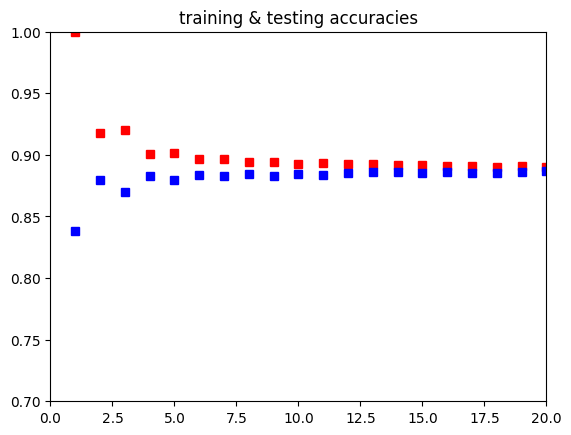

In [10]:
import matplotlib.pyplot as plt
plt.axis([0, 20, 0.7, 1])
plt.plot(kneighboors, training_accuracies, 'rs', kneighboors, testing_accuracies, 'bs')
plt.title('training & testing accuracies')
plt.show()

## F.7 Based on the plot, identify the following values:

*3 POINTS*

- number of nearest neighbors for which the KNN is underfitting (if there is underfitting!)
- number of nearest neighbors for which the KNN is overfitting (if there is overfitting!)
- optimal number of nearest neighbors according to you, and comment on your decision

Underfitting occurs when the model is too simple and fails to capture the underlying patterns in the data. In this case, we don't observe underfitting because the training accuracy and testing accuracy are both high for 1 nearest neighbor, indicating that the model is able to capture the patterns in the data.

Overfitting occurs when the training accuracy is high while the testing accuracy is significantly lower, indicating that the model is too complex and has memorized the training data. By analyzing plot it seems for nearest neighbor 1 KNN is overfitting.

The optimal number of nearest neighbors can be identified by finding the point where the testing accuracy is highest or reaches a plateau while the model remains adequately generalized. By analyzing the plot we see optimal number for nearest neighbors is 20

## F.8 Train a KNN on the training sample

*1 POINT*

- using the optimal number of nearest neighbors identified in D.6

In [11]:
clf = KNeighborsClassifier(n_neighbors=20)
clf_fit = clf.fit(features_train, target_train)


## F.9 Evaluate accuracy of this prediction

*1 POINT*

Print the result

In [12]:
testing_predictions = clf_fit.predict(features_test)
testing_accuracy = accuracy_score(target_test, testing_predictions)
print(f"Testing Accuracy: {testing_accuracy}")


Testing Accuracy: 0.8866781624441792


# G. Model Comparison

Now that we created three different Machine Learning models, we need to decide which is the best one for our specific use-case.

## G.1 Compare decision tree, support vector machine and k-nearest neighbors classifiers on:

*4 POINTS*

- predictive accuracy (testing accuracy of optimal complexity)
- processing time ('affordable' or 'not affordable')
- ability to estimate class probability for a new observation ('yes', 'no')

**Decision tree classifiers**

- predictive accuracy: ...
- processing time: ...
- can output class probability: ...

Predictive Accuracy: The predictive accuracy of the decision tree classifier depends on the complexity of the tree, specifically the depth and split criteria used. In the given information, the testing accuracy of the decision tree with the optimal maximum depth (6) was 0.9019.

Processing Time: The processing time for training a decision tree classifier is generally fast compared to some other models. However, the exact processing time can vary depending on factors such as the size of the dataset and the complexity of the tree. the processing time in the given context is few seconds, which is faster then SVM and KNN

Class Probability Output: Yes, decision tree classifiers can output class probabilities for a new observation. This is typically done by calculating the relative frequency of each class within the leaf node that the observation falls into. The class probability can provide additional information about the certainty of the prediction.

Overall, decision tree classifiers can provide reasonable predictive accuracy, typically have fast processing times, and are capable of outputting class probabilities.

**Support vector machine classifiers (non linear)**

- predictive accuracy: ...
- processing time: ...
- can output class probability: ...

Predictive Accuracy: The predictive accuracy of the SVM classifier depends on various factors such as the choice of kernel function, regularization parameter (C), and kernel-specific parameters. In the given information, the testing accuracy of the non-linear SVM with a penalty parameter (C) of 1 and a gamma value of 10 was 0.8845.

Processing Time: Training a non-linear SVM classifier can be computationally expensive, especially when dealing with large datasets or complex kernel functions. The processing time for training an SVM classifier depends on the number of samples, number of features, and the complexity of the chosen kernel. With processing time of almost 2 minutes in the given context, it is considered affordable.

Class Probability Output: SVM classifiers are not inherently designed to output class probabilities. The standard SVM algorithm aims to find the optimal decision boundary that maximally separates the classes, rather than directly estimating class probabilities. However, there are techniques such as Platt scaling and cross-validation that can be used to approximate class probabilities from the SVM decision values.

**K-nearest neighbors classifiers**

- predictive accuracy: ...
- processing time: ...
- can output class probability: ...

K-nearest neighbors (KNN) classifiers have a predictive accuracy of 0.8866, which indicates how well the model performs in correctly classifying the customers in the testing dataset. The higher the accuracy, the better the model's performance in making accurate predictions.

In terms of processing time, KNN can not be considered affordable because it took almost 8 minutes to process. The training process of KNN involves storing the entire training dataset, and the prediction process involves calculating distances between the new observation and all the training samples. This can be computationally expensive, especially as the dataset is larger.

When it comes to class probability estimation, KNN classifiers do not have a built-in mechanism to directly output class probabilities for a new observation. Instead, KNN assigns the class label based on the majority vote of the k-nearest neighbors. Therefore, KNN cannot directly provide class probabilities as an output. However, we can indirectly estimate the probabilities by using the proportion of neighbors in each class as a measure of confidence.

## G.2 Based on this comparaison, which classifier would you choose to estimate probability to subscribe to a term deposit? Explain your answer.

*2 POINTS*

Based on the comparison of the classifiers, the decision tree classifier would be the preferred choice to estimate the probability of subscribing to a term deposit.

The decision tree classifier has a relatively high predictive accuracy of 0.9019, indicating its ability to accurately classify customers as potential subscribers or non-subscribers. It performs well in capturing the patterns and relationships in the dataset.

In terms of processing time, the decision tree classifier is faster compared to the non-linear SVM and K-nearest neighbors classifiers. The training and prediction process of a decision tree is generally efficient, especially for datasets of moderate size.

Additionally, the decision tree classifier can output class probabilities for a new observation. This is valuable in understanding the confidence level of the classification. By considering the class probabilities, we can make more informed decisions based on the likelihood of a customer subscribing to a term deposit.

Therefore, considering the high predictive accuracy, affordable processing time, and the ability to estimate class probabilities, the decision tree classifier is a suitable choice for estimating the probability of subscribing to a term deposit in this scenario.

# H. Feature Importance

When you create Machine Learning models, it's often interesting to know what were the most important features to create the predictions. For a lot of Machine Learning models, it can be difficult to extract this feature importance, but not for Decision Trees. That's what you'll do in this section.

In Decision Trees, it's fairly easy to compute the features importance of a model. It means, the features that were the most important ones to predict well the output.

Please see the official documentation about features importance for Decision Trees in sklearn here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#:~:text=The%20importance%20of%20a%20feature,See%20sklearn.

The Python could be something like this:

```
clf = tree.DecisionTreeClassifier(...)
clf_fit = clf.fit(...)

print(clf_fit.feature_importances_)
```

**NB**: The feature importance outputs a list in the order of the features you gave in input (aka the "variables" variable you defined earlier). I know, it thus can be difficult to read. A solution can be to run this Python code:

```
for feature_imp, variable in zip(clf_fit.feature_importances_, variables):
  print(f"{variable}: {round(feature_imp*100, 1)}%")
```

## H.1 Compute feature importance for Decision Trees

*2 POINTS*

Use the optimal Decision Tree model trained in the **question D.8**

In [23]:
optimal_max_depth = 6  # Replace with the optimal maximum depth identified in B.6

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=optimal_max_depth, min_samples_split=0.005)
clf.fit(features_train, target_train)
clf_fit = clf
# Compute feature importance
feature_importance = clf_fit.feature_importances_

# Print feature importance
for feature_imp, variable in zip(feature_importance, variables):
    print(f"{variable}: {round(feature_imp*100, 1)}%")


age: 6.8%
job_is_employee: 0.0%
job_is_entrepreneur: 0.0%
job_is_manager: 0.0%
job_is_retired: 0.0%
job_is_student: 0.1%
job_is_unemployed: 0.1%
marital_is_married: 0.0%
marital_is_single: 0.3%
marital_is_divorced: 0.0%
education_is_tertiary: 0.4%
education_is_secondary: 0.0%
education_is_primary: 0.0%
education_is_unknown: 0.0%
poutcome_is_failure: 0.0%
poutcome_is_success: 26.1%
poutcome_is_unknown: 0.0%
isdefault: 0.0%
balance: 1.2%
housing: 8.3%
loan: 0.0%
duration: 56.2%
campaign: 0.3%
previous: 0.3%


## H.2 Reflect on the feature importance obtained. Do they align on your intuition and understanding of the marketing campaign dataset? If not, discuss possible reasons for the discrepancies.

*3 POINTS*

The obtained feature importance aligns with some intuitive expectations about the marketing campaign dataset, but there are also a few discrepancies. Here is a discussion of the feature importance and possible reasons for the discrepancies:

"Duration" (56.2%): The high importance of the "duration" feature is reasonable. Longer call durations may indicate more engaging conversations with customers, which can potentially influence their decision to subscribe to a term deposit.

"Poutcome_is_success" (26.1%): The importance of the "poutcome_is_success" feature suggests that the outcome of the previous marketing campaign plays a significant role. If a previous campaign was successful, it increases the likelihood of a customer subscribing to a term deposit in the current campaign.

"Housing" (8.3%): The importance of the "housing" feature indicates that whether a customer has a housing loan affects their likelihood of subscribing to a term deposit. It is reasonable to assume that customers with housing loans may have different financial priorities and, therefore, have varying responses to the campaign.

"Age" (6.8%): The importance of the "age" feature suggests that age plays a modest role in predicting term deposit subscriptions. Different age groups may have different financial goals and risk preferences, which can influence their response to the marketing campaign.

However, there are some discrepancies with intuitive expectations:

"Job" features: The importance of job-related features is relatively low (all at 0.0%). This might be surprising since job type could be expected to have an impact on a person's financial situation and their likelihood of subscribing to a term deposit. It's possible that other features capture the information related to job type, resulting in lower relative importance for these specific job-related features.

"Marital" and "Education" features: The importance of marital and education-related features is also relatively low. This could be due to the dataset's specific characteristics, such as a homogeneous distribution of these variables or their limited impact on the outcome compared to other factors.

"Campaign," "Previous," and "Balance" features: These features have relatively low importance despite being potentially relevant factors. It's possible that other variables in the dataset capture the information these features provide, resulting in their lower relative importance.

These discrepancies might arise due to interactions and dependencies between features, multicollinearity, or limitations in the dataset. Feature importance is derived from the model's internal decision-making process and does not necessarily reflect the true causal relationships between features and the target variable. Further exploration and analysis would be required to better understand the relationships between features and their impact on the marketing campaign's outcome.

# I. Communication & Critical Thinking

When you create Machine Learning models, the most important part is maybe when you communicate the results you got. You can use the best Machine Learning models possible; if you can't communicate the results well, you won't be able to create actionable insights out of this.

Another very important aspect of Machine Learning models is ethics: you can do a lot of things with Machine Learning, but are there ethical? It's crucial to always ask yourself about the ethical implications of the models you build.

## I.1 Imagine you need to explain the key results and insights from the Machine Learning models to non-technical stakeholders. How would you communicate the results in a clear, concise, and accessible manner?

*5 POINTS*

When communicating the key results and insights from Machine Learning models to non-technical stakeholders, it is essential to prioritize clarity, conciseness, and accessibility. Here are five ways to effectively communicate the results:

Use visualizations: Utilize visual aids such as charts, graphs, and diagrams to present the results in a visually appealing and easily understandable format. Visualizations can help convey patterns, trends, and comparisons effectively.

Focus on high-level insights: Start by highlighting the most important findings and insights from the models. Summarize the key points in simple language and avoid technical jargon. Emphasize the practical implications and how they relate to the stakeholders' goals or objectives.

Provide context and background: Briefly explain the problem or objective that the Machine Learning models were designed to address. Provide a concise overview of the data used, the modeling approach, and any notable assumptions or limitations.

Highlight actionable recommendations: Translate the model's insights into actionable recommendations that stakeholders can implement. Clearly outline the steps or strategies that can be taken based on the findings to improve decision-making or achieve desired outcomes.

Address ethical considerations: Discuss the ethical implications of the models and any potential biases or limitations that should be considered. Explain how fairness, transparency, and privacy were addressed during the model development and deployment process. Encourage an open dialogue about ethical concerns and invite stakeholder input.

Overall, the key is to strike a balance between simplifying the technical aspects without oversimplifying or losing important details. It is crucial to tailor the communication to the stakeholders' level of understanding and provide them with clear and actionable insights that they can easily comprehend and apply in their decision-making processes.

## I.2 How would you address the ethical implications of using Machine Learning algorithms in a marketing context? Did you think of any ethical aspects in this project? Consider aspects like fairness, accountability, and transparency.

*5 POINTS*

When addressing the ethical implications of using Machine Learning algorithms in a marketing context, it is important to consider aspects such as fairness, accountability, and transparency. In this project, several ethical aspects can be identified:

Fairness: It is crucial to ensure that the use of Machine Learning algorithms in marketing does not result in unfair discrimination or bias. Care should be taken to avoid any discriminatory outcomes based on protected attributes such as race, gender, or age. Evaluating and mitigating bias in the data and model predictions should be a priority to ensure fairness in targeting and decision-making processes.

Accountability: Organizations using Machine Learning algorithms in marketing should take responsibility for their actions and the potential impact on individuals and society. This includes being accountable for the data used, the algorithms deployed, and the decisions made based on the predictions. Establishing clear processes for monitoring and addressing any negative consequences or unintended outcomes is essential.

Transparency: Transparency is vital in ensuring that individuals understand how their data is being used and how Machine Learning algorithms are influencing marketing decisions. Organizations should provide clear and accessible explanations of the data collection, processing, and modeling techniques used. Communicating the factors that contribute to predictions, such as feature importance, can help individuals understand the basis for marketing targeting.

Informed Consent: Respecting individuals' privacy and obtaining informed consent for data collection and usage is crucial. Organizations should be transparent about the purposes for which data is being collected and provide individuals with clear options for opting in or out of data usage. It is important to give individuals control over their personal information and respect their preferences regarding marketing communications.

Data Security and Privacy: Organizations should implement robust data security measures to protect individuals' personal information. They should comply with applicable data protection regulations and ensure that data is collected, stored, and processed securely. Safeguarding privacy and preventing unauthorized access to data is essential to maintain trust and ethical standards.

By considering these ethical aspects, organizations can promote fairness, accountability, and transparency in their use of Machine Learning algorithms in marketing. This helps build trust with customers, ensures compliance with regulations, and minimizes the potential negative impacts on individuals and society.